AI基礎プログラミング 効果測定1 問題3

以下のプログラムを実装してください

読み込むCSVファイル  「Survived_kouka1.csv」

In [123]:
# matplolibを表示できるようにする
%matplotlib inline

# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import pickle

# CSVファイルを読み込む
df = pd.read_csv('Survived_kouka1.csv')

# 変数dfの先頭5行の中身を表示する
print(df.head())

# 各列の欠損値の件数を表示する
print(df.isnull().sum())

   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500    NaN         S
1            2         1       1  ...  71.2833    C85         C
2            3         1       3  ...   7.9250    NaN         S
3            4         1       1  ...  53.1000   C123         S
4            5         0       3  ...   8.0500    NaN         S

[5 rows x 11 columns]
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [124]:
# ★① 「Survived」列のデータに偏りが有るかどうか(データごとの出現回数)を確認する
# ※なお、今回はデータに「偏りが有る」と判断したものとする
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

▶実行結果  
0    549  
1    342  
Name: Survived, dtype: int64

In [125]:
# ★② 「Survived」列を基準に、「Age」列の『平均値』を表示する
df.groupby('Survived').mean()['Age']

Survived
0    30.542453
1    28.315017
Name: Age, dtype: float64

▶実行結果  
Survived  
0    30.542453  
1    28.315017  
Name: Age, dtype: float64

In [126]:
# ★③ 「Survived」列のデータと「Pclass」列でクロス集計して、「Age」列の『中央値』を表示する
pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = 'median')

Pclass,1,2,3
Survived,,,
0,45.25,30.0,25.0
1,35.00,28.0,22.0


▶実行結果  
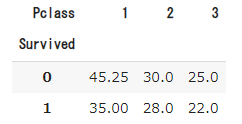

In [127]:
# ★④ 以下の条件に当てはまる「Age」列を 29 に置き換える
# 「Pclass」列 = 2
# 「Sex」列 = male
# 「Survived」列 = 1
# 「Age」列 = NaN(欠損値)
df.loc[(df['Pclass'] == 2) & (df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] == 'NaN')] = 29

# 上記以外の「Age」列の欠損値は 平均値で置き換える
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [128]:
# 特徴量と正解データを以下の列とする
# 特徴量　…　「Pclass」「Age」「SibSp」「Parch」「Fare」「Sex」
#              ※「Sex」列はダミー変数化する
# 正解データ　…　「Survived」

# 「Sex」列以外の特徴量を変数Xに代入する
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# ★⑤ 「Sex」列をダミー変数化し、「male」列のみを変数maleに代入する
male = pd.get_dummies(df['Sex'])
male = male.loc[:, 'male']

# ★⑥ 変数Xに上記の変数maleを横方向に連結した結果を、変数Xに代入しなおす
X = pd.concat([X, male] , axis=1)

# 正解データを変数yに代入する
y = df['Survived']

# ★⑦ 変数X, 変数yを「学習で用いるデータ」と「テストで用いるデータ」に分割する
# * テストデータに使用する割合を『30%』、乱数シードは0とする
# * 「学習で用いるデータ」の特徴量を変数X_trainに代入する
# * 「テストで用いるデータ」の特徴量を変数X_testに代入する
# * 「学習で用いるデータ」の正解データを変数y_trainに代入する
# * 「テストで用いるデータ」の正解データを変数y_testに代入する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [129]:
# ★⑧ 決定木を生成する
# * 深さは5とする
# * 乱数シードは0とする
# * 不均衡データへ対処するオプションを使用する
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight ='balanced')

# 「学習で用いるデータ」を使って学習する
model.fit(X_train, y_train)

# ★⑨ 「学習で用いるデータ」、「テストで用いるデータ」での正解率を表示する
# 「学習で用いるデータ」での正解率を表示する
print('==学習データの正解率==')
print(model.score(X_train, y_train))

# 「テストで用いるデータ」での正解率を表示する
print('==テストデータの正解率==')
print(model.score(X_test, y_test))

==学習データの正解率==
0.8346709470304976
==テストデータの正解率==
0.7873134328358209


▶実行結果  
==学習データの正解率==  
0.8346709470304976  
==テストデータの正解率==  
0.7873134328358209

In [130]:
# ★⑩ 分岐条件の列、閾値を表示する
# 特徴量(X_train)の列名を表示する
print("==列名==")
print(X_train.columns)

# 決定木の分岐条件の列を表示する
print("==分岐条件の列==")
print(model.tree_.feature)


# 決定木の分岐条件の閾値を表示する
print("==閾値==")
print(model.tree_.threshold)

==列名==
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')
==分岐条件の列==
[ 5  0  1 -2  4  4 -2 -2  4 -2 -2  4  1  2 -2 -2 -2  3 -2  1 -2 -2  1  2
  3  2 -2 -2  2 -2 -2 -2  0  1  4 -2 -2  1 -2 -2  1  1 -2 -2  4 -2 -2]
==閾値==
[  0.5          2.5          2.5         -2.          28.85624981
  28.23124981  -2.          -2.         149.03540039  -2.
  -2.          23.35000038  38.5          2.5         -2.
  -2.          -2.           0.5         -2.           5.5
  -2.          -2.          14.           2.5          0.5
   0.5         -2.          -2.           0.5         -2.
  -2.          -2.           1.5         53.          26.14375019
  -2.          -2.          75.5         -2.          -2.
  32.5         30.75        -2.          -2.           7.91040015
  -2.          -2.        ]


▶実行結果  
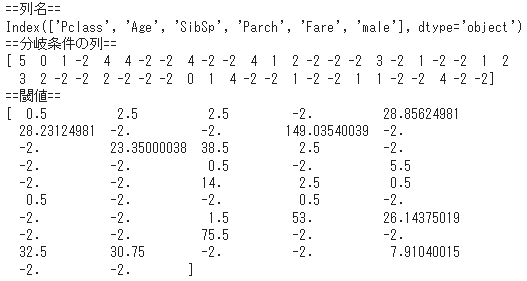

### 決定木を保存する

In [131]:
# ★⑪ 学習させた決定木を「kouka1_model1.pkl」という名前で保存する
with open('kouka1_model1.pkl', 'wb') as f:
    pickle.dump(model, f)